# Exploratory Data Analysis

## Init: Prepare Packages and Configuration

In [1]:
# Cancel the comment to install all the packages and libraries needed.
# ! pip install rasterio matplotlib rasterstats ipynbname imageio tqdm rasterstats
# ! pip install numpy==1.24.4CURR_PATH
# ! pip install libpysal
# ! pip install geopandas libpysal esda matplotlib
# ! pip install seaborn

# Configuration
from pathlib import Path
import sys

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# Import customised scripts
from aggregation import*
from missingvalue import*
from visualization import*

# print(REPO_PATH)

## 0 Merge Multiple Features Into One Mesh

Add all attributes of the map to a single GeoPackage file.

#### Ethiopia - Addis Ababa

In [ ]:
# Addis Ababa
from helpercollections import merge_multiple_gpkgs

addis_feature_mesh_paths = [DATA_PATH / "addis-no2-mesh-data", 
                            DATA_PATH / "addis-pop-mesh-data",
                            DATA_PATH / "addis-NTL-mesh-data",
                            DATA_PATH / "addis-OSM-mesh-data"
                            ]
output_folder = DATA_PATH / "addis-mesh-data"
merge_multiple_gpkgs(addis_feature_mesh_paths, output_folder)


Demo: the data structure of the combined GeoPackage file.

In [5]:
# Load the single Addis mesh
gdf_addis = gpd.read_file(DEMO_PATH / "addis-ababa-2023-01-01.gpkg")
gdf_addis.head(5)

,geom_id,no2_mean,pop_sum_m,road_len,road_share,poi_count,poi_share,lu_industrial_area,lu_industrial_share,lu_commercial_area,lu_commercial_share,lu_residential_area,lu_residential_share,lu_retail_area,lu_retail_share,lu_farmland_area,lu_farmland_share,lu_farmyard_area,lu_farmyard_share,geometry
0,0,0.000051,969.683960,5860.594010,0.000745,0,0.0,0.00000,0.000000,0.000000,0.000000,36966.940599,0.000186,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((38.78925 8.83942, 38.78925 8.84841, ..."
1,1,0.000033,1574.853149,3915.685527,0.000498,0,0.0,0.00000,0.000000,0.000000,0.000000,95415.608003,0.000480,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((38.79824 8.83942, 38.79824 8.84841, ..."
2,2,0.000033,1859.865723,6119.289265,0.000778,0,0.0,0.00000,0.000000,131579.292358,0.059429,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((38.80722 8.83942, 38.80722 8.84841, ..."
3,3,0.000033,888.301453,1967.274486,0.000250,0,0.0,0.00000,0.000000,1278.331461,0.000577,4786.043431,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((38.8162 8.83942, 38.8162 8.84841, 38..."
4,4,0.000033,4331.832031,6929.670478,0.000881,0,0.0,216427.55037,0.021645,0.000000,0.000000,267223.812632,0.001345,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((38.82519 8.83942, 38.82519 8.84841, ..."


#### Iraq - Baghdad

In [ ]:
# Baghdad
baghdad_feature_mesh_paths = [DATA_PATH / "baghdad-no2-mesh-data", 
                              DATA_PATH / "baghdad-pop-mesh-data",
                              DATA_PATH / "addis-NTL-mesh-data",
                              DATA_PATH / "baghdad-OSM-mesh-data"
                              ]
output_folder = DATA_PATH / "baghdad-mesh-data"
merge_multiple_gpkgs(baghdad_feature_mesh_paths, output_folder)

Demo: the data structure of the combined GeoPackage file.

In [4]:
# Load the single Addis mesh
gdf_baghdad = gpd.read_file(DEMO_PATH / "baghdad-2023-01-01.gpkg")
gdf_baghdad.head(5)

,geom_id,no2_mean,pop_sum_m,road_len,road_share,poi_count,poi_share,lu_industrial_area,lu_industrial_share,lu_commercial_area,lu_commercial_share,lu_residential_area,lu_residential_share,lu_retail_area,lu_retail_share,lu_farmland_area,lu_farmland_share,lu_farmyard_area,lu_farmyard_share,geometry
0,0,0.000111,44.653709,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((44.56542 32.81546, 44.56542 32.82444..."
1,1,0.000111,45.872368,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((44.5744 32.81546, 44.5744 32.82444, ..."
2,2,0.000111,40.733757,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((44.58339 32.81546, 44.58339 32.82444..."
3,3,0.000111,13.556228,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((44.59237 32.81546, 44.59237 32.82444..."
4,4,0.000107,39.033630,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((44.54745 32.82444, 44.54745 32.83342..."


## 1 Univariate Data Analysis

### 1.1 NO2 Analysis

#### **1) Temporal Analysis**

#### Note

**Addis Ababa**

In temporal analysis, we grouped days considering working schema from Ethiopia, including **Workdays**, **Weekends**.

- Type i - Workdays: Mon-Fri
- Type ii - Weekends: Sat-Sun

**Baghdad**

In temporal analysis, we grouped days considering working schema from Iraq **Mon-Tue-Wed**, **Fri-Sat**, **Thu-Sun**.

- Type i - Working days: Mon-Tue-Wed
- Type ii - Extended working days: Thu-Sun     
- Type iii - Weekends: Fri-Sat

Day type is encoded using *str* type.

In [ ]:
import pandas as pd

# Read helper table
date_df = pd.read_csv(DATA_PATH / "helper-files" / "workday_type_2023_2024.csv", parse_dates=["Date"])
print(f'Helper Date Table:\n{date_df.head(3)}')

# Set Output path
output_path = DATA_PATH / "exploratory-data-analysis"

#### Ethiopia - Addis Ababa

Calculate the average NO2 distribution in both workdays and weekends in Addis Ababa.

In [ ]:
addis_workday_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "addis_ababa_workdays_weekends_no2_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa"
)


Compare the results in different workday types.

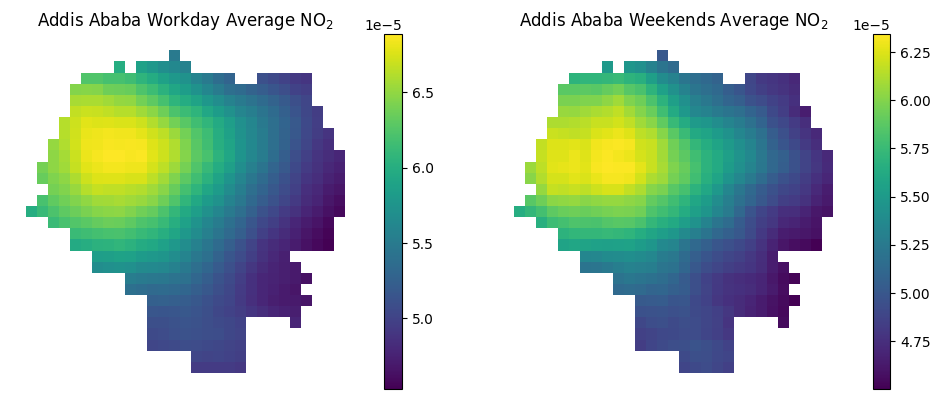

In [3]:
addis_workday_average = gpd.read_file(DEMO_PATH / "addis_ababa_workdays_weekends_no2_mesh.gpkg")
fig, axes = plt.subplots(1,2, figsize=(10, 4))
plot_mesh(addis_workday_average, "Workdays_mean", title="Addis Ababa Workday Average NO$_2$", ax = axes[0], show_edges=False, show=False)
plot_mesh(addis_workday_average, "Weekends_mean", title="Addis Ababa Weekends Average NO$_2$", ax = axes[1], show_edges=False, show=False)
plt.tight_layout()
plt.show()

#### Iraq - Baghadad

Calculate the average NO2 distribution in different days, from Monday to Sunday in Baghdad.

In [ ]:
baghdad_workday_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "baghdad_workdays_weekends_no2_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad"
)


Compare the results in different workday types, we have three in this Baghdad ('Mon-Tue-Wed', 'Fri-Sat' and 'Thu-Sun').

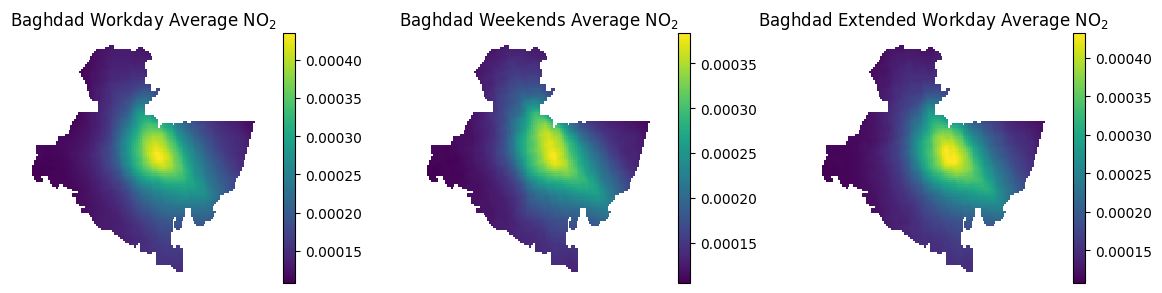

In [2]:
baghdad_workday_average = gpd.read_file(DEMO_PATH / "baghdad_workdays_weekends_no2_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(12, 3))
plot_mesh(baghdad_workday_average, "Mon-Tue-Wed_mean", title="Baghdad Workday Average NO$_2$", ax = axes[0], show_edges=False, show=False)
plot_mesh(baghdad_workday_average, "Thu-Sun_mean", title="Baghdad Extended Workday Average NO$_2$", ax = axes[2], show_edges=False, show=False)
plot_mesh(baghdad_workday_average, "Fri-Sat_mean", title="Baghdad Weekends Average NO$_2$", ax = axes[1], show_edges=False, show=False)
plt.tight_layout()
plt.show()

#### 2) Spatial Analysis

In [ ]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display

In [ ]:
# Data paths and settings
data_folder = DATA_PATH / "baghdad-no2-mesh"
shapefile_path = DATA_PATH / "city-boundary/baghdad/baghdad-adm3.shp"
output_folder = DATA_PATH / "baghdad-time-series-plots/2024"
output_folder.mkdir(parents=True, exist_ok=True)


In [ ]:
# Load administrative boundary
adm3 = gpd.read_file(shapefile_path).to_crs(epsg=4326)
adm3 = adm3.reset_index(drop=True).reset_index().rename(columns={"index": "adm_id"})

# Initialize an empty list to collect daily NO2 averages
time_series_data = []

# Loop through daily GPKG files and calculate mean NO2 for each ADM3 zone
for f in sorted(os.listdir(data_folder)):
    if not f.endswith(".gpkg") or not f.startswith("baghdad-2024"):
        continue

    date_str = f.split("baghdad-")[1].replace(".gpkg", "")
    try:
        date = datetime.strptime(date_str, "%Y-%m-%d")
    except:
        continue

    gdf = gpd.read_file(os.path.join(data_folder, f))
    if gdf.empty or "no2_mean" not in gdf.columns:
        continue

    gdf = gdf[gdf.geometry.notnull() & gdf.is_valid]
    gdf = gdf.dropna(subset=["no2_mean"])
    gdf = gdf.to_crs(adm3.crs)

    joined = gpd.sjoin(gdf, adm3, how="inner", predicate="intersects")
    daily_avg = joined.groupby("adm_id")["no2_mean"].mean().reset_index()
    daily_avg["date"] = date
    time_series_data.append(daily_avg)

# panel-format dataframe
df_all = pd.concat(time_series_data)
pivot_df = df_all.pivot(index="date", columns="adm_id", values="no2_mean")

# Calculate overall max NO₂ value across all zones to standardize y-axis
ymax = pivot_df.max().max()

# Plot ADM3 zones
for i, adm_id in enumerate(pivot_df.columns):
    adm_name = adm3.loc[adm3.adm_id == adm_id, "ADM3_EN"].values[0]
    series = pivot_df[adm_id]

    fig, (ax_map, ax_line) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 1.2]})
    fig.suptitle(f"{adm_name} — Daily NO₂ in 2024", fontsize=14)

    # Top subplot: map
    adm3.boundary.plot(ax=ax_map, linewidth=0.5, edgecolor="gray")
    adm3.loc[adm3.adm_id == adm_id].plot(ax=ax_map, color="orange")
    ax_map.axis("off")

    # Bottom subplot: time series
    series.plot(ax=ax_line, color="darkgreen", label="Daily NO₂")
    mean_val = series.mean()
    ax_line.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2e}")

    ax_line.set_ylabel("NO₂ (mol/m²)")
    ax_line.set_xlabel("Date")
    ax_line.set_ylim(0, ymax * 1.1)
    ax_line.set_title(f"Daily Average NO₂ for {adm_name}")
    ax_line.legend()

    plt.tight_layout()

    # Save figure
    out_path = os.path.join(output_folder, f"{adm_name.replace(' ', '_')}_baghdad_2024.png")
    #fig.savefig(out_path, dpi=100)

    # Show only the first 3 plots
    if i < 3:
        plt.show()
    else:
        plt.close()


In [ ]:
import geopandas as gpd
import pandas as pd
import glob
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran, Moran_Local

# ---------- 参数设置 ----------
addis_gpkg_dir = DATA_PATH / "addis-mesh-data"  # GPKG 文件夹路径
no2_column = "no2_mean"        # no2 列名
simplify_geometry = False # 是否简化 geometry（可选）

# ---------- 步骤 1：合并所有 GPKG ----------
print("正在加载 GPKG 文件...")
files = addis_gpkg_dir.glob("*.gpkg")
gdfs = [gpd.read_file(f) for f in files]
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))


In [ ]:

# ---------- 步骤 2：提取 no2 列并去除缺失值 ----------
print("清洗数据...")
no2_gdf = merged_gdf[['geometry', no2_column]].copy()
no2_gdf = no2_gdf.dropna(subset=[no2_column])
no2_gdf = no2_gdf.reset_index(drop=True)

# 可选：简化 geometry（加速邻接构建）
if simplify_geometry:
    no2_gdf['geometry'] = no2_gdf['geometry'].simplify(0.001)

# ---------- 步骤 3：构建 Queen 邻接矩阵 ----------
print("构建空间邻接矩阵（Queen 邻接）...")
w = Queen.from_dataframe(no2_gdf)
w.transform = 'r'  # row-standardized weights

# ---------- 步骤 4：计算全局 Moran’s I ----------
print("计算 Moran's I...")
moran = Moran(no2_gdf[no2_column], w)
print(f"Moran’s I: {moran.I:.4f}")
print(f"p-value (normal approximation): {moran.p_norm:.4f}")

# ---------- 步骤 5：计算局部 Moran’s I (LISA) ----------
print("计算局部自相关 (Moran_Local)...")
moran_local = Moran_Local(no2_gdf[no2_column], w)
no2_gdf['Is_Hotspot'] = moran_local.Is
no2_gdf['Local_I'] = moran_local.Is * moran_local.q  # 四象限编码（1=HH, 2=LH, 3=LL, 4=HL）

# ---------- 步骤 6：可视化 Hotspot Map ----------
print("绘制热点图...")
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
no2_gdf.plot(column='Local_I', cmap='coolwarm', legend=True, ax=ax)
ax.set_title("局部空间自相关 (LISA): no2", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


Temporal### 1.2 Population  Analysis

### 1.2 Population Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read population data for mesh (gpkg)

addis_2023 = gpd.read_file(DEMO_PATH / "addis-ababa-2023-01-01.gpkg")
addis_2024 = gpd.read_file(DEMO_PATH / "addis-ababa-2024-01-01.gpkg")
baghdad_2023 = gpd.read_file(DEMO_PATH / "baghdad-2023-01-01.gpkg")
baghdad_2024 = gpd.read_file(DEMO_PATH / "baghdad-2024-01-01.gpkg")

print(addis_2023.columns)


In [ ]:
# Set the name of the column that contains population values
pop_column = 'pop_sum_m'

# Create a 2x2 grid of subplots for plotting boxplots of each dataset
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Addis 2023
axes[0, 0].hist(addis_2023[pop_column], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Addis Ababa 2023')
axes[0, 0].set_xlabel('Population per Cell')
axes[0, 0].set_ylabel('Number of Cells')

# Baghdad 2023
axes[0, 1].hist(baghdad_2023[pop_column], bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_title('Baghdad 2023')
axes[0, 1].set_xlabel('Population per Cell')
axes[0, 1].set_ylabel('Number of Cells')

# Addis 2024
axes[1, 0].hist(addis_2024[pop_column], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Addis Ababa 2024')
axes[1, 0].set_xlabel('Population per Cell')
axes[1, 0].set_ylabel('Number of Cells')

# Baghdad 2024
axes[1, 1].hist(baghdad_2024[pop_column], bins=30, color='plum', edgecolor='black')
axes[1, 1].set_title('Baghdad 2024')
axes[1, 1].set_xlabel('Population per Cell')
axes[1, 1].set_ylabel('Number of Cells')

plt.tight_layout()
plt.show()


In [ ]:
# Prepare data for boxplot
data = [
    addis_2023[pop_column],
    addis_2024[pop_column],
    baghdad_2023[pop_column],
    baghdad_2024[pop_column]
]

labels = ['Addis 2023', 'Addis 2024', 'Baghdad 2023', 'Baghdad 2024']

# Plot boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(data, labels=labels, showfliers=True)

# Add title and labels
plt.title('Population per Cell: Boxplot Comparison')
plt.ylabel('Population per Cell')
plt.xlabel('City and Year')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2 Multivariate Data Analysis

### 2.1 Correlation Matrix

Merge 730 day data in meshes, calculate the correlation matrix and visualize it.

Reading GPKG files:   0%|          | 0/731 [00:00<?, ?it/s]

Reading GPKG files: 100%|██████████| 731/731 [00:07<00:00, 101.68it/s]
D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\src\visualization.py:524: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_gdf = pd.concat(gdfs, ignore_index=True)


Dropped 12544 rows (3.14%) due to missing values


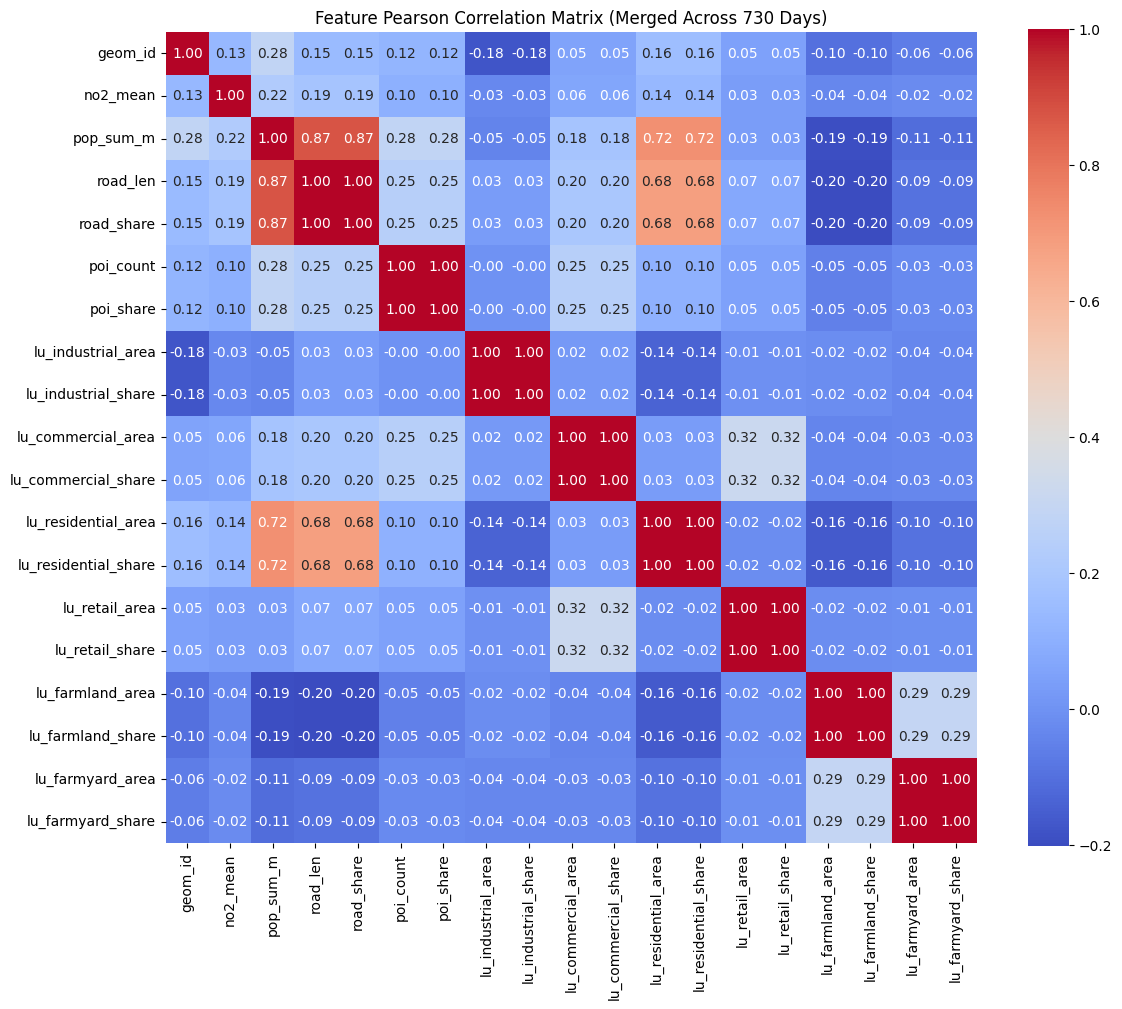

Heatmap saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


In [2]:
gpkg_folder = DATA_PATH / "addis-mesh-data"
output_path = DATA_PATH / "demo-data"

plot_feature_correlation_heatmap(
        data_folder=gpkg_folder, 
        output_path=output_path, 
        plot_name="Feature Pearson Correlation Matrix (Merged Across 730 Days)",
)